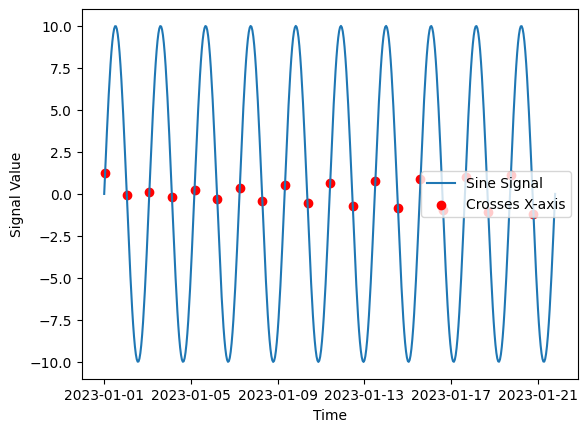


Original DataFrame:
            time_series        signal  segment_id
0   2023-01-01 00:00:00  0.000000e+00           0
1   2023-01-01 01:00:00  1.255831e+00           1
2   2023-01-01 02:00:00  2.491777e+00           1
3   2023-01-01 03:00:00  3.688269e+00           1
4   2023-01-01 04:00:00  4.826362e+00           1
..                  ...           ...         ...
495 2023-01-21 15:00:00 -4.826362e+00          20
496 2023-01-21 16:00:00 -3.688269e+00          20
497 2023-01-21 17:00:00 -2.491777e+00          20
498 2023-01-21 18:00:00 -1.255831e+00          20
499 2023-01-21 19:00:00 -2.449294e-14          20

[500 rows x 3 columns]


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine signal with more data points
time_series = pd.date_range(start='2023-01-01', periods=500, freq='H')  # Increase the number of periods
signal = 10 * np.sin(np.linspace(0, 20 * np.pi, 500))  # Increase the number of data points

# Create a DataFrame
df = pd.DataFrame({'time_series': time_series, 'signal': signal})

# Identify the points where the signal crosses the x-axis
df['crosses_x_axis'] = ((df['signal'] > 0) & (df['signal'].shift(1) <= 0) | (df['signal'] < 0) & (df['signal'].shift(1) >= 0)).astype(int)

# Create a unique identifier for each segment
df['segment_id'] = df['crosses_x_axis'].cumsum()

# Plot the sine signal with red marks at points where it crosses the x-axis
plt.plot(df['time_series'], df['signal'], label='Sine Signal')
plt.scatter(df[df['crosses_x_axis'] == 1]['time_series'], df[df['crosses_x_axis'] == 1]['signal'], color='red', label='Crosses X-axis')

# Add labels and legend to the plot
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.legend()
plt.show()

# Print the DataFrame with the calculated areas
print("\nOriginal DataFrame:")
print(df.drop('crosses_x_axis', axis=1))
